# <데이터 분석 기초 텀 프로젝트>
- 주제 : BELP Fitbit 생체정보를 이용한 데이터 분석
- 사용한 Data sets : fitbit_data.csv

<br>ver 2.0</br>

## 1. csv파일을 Pandas DataFrame으로 받고, 수집 기간동안의 평균 소모 칼로리, 평균 이동거리, 평균 step수를 출력해 보세요.

### csv 파일 읽어드리고 DataFrame 만들기

In [1]:
import pandas as pd
import numpy as np

fitbit_data = "./fitbit_data.csv" # 데이터 읽어들이기
fitbit = pd.read_csv(fitbit_data)

fitbit

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
...,...,...,...,...
162,2021.11.10,2498.06,5.660000,7912
163,2021.11.11,2732.86,9.000000,12536
164,2021.11.12,2774.22,6.450000,8985
165,2021.11.13,2954.84,7.710000,10621


In [2]:
# 컬럼 정보 보기
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       167 non-null    object 
 1   calories   167 non-null    float64
 2   distances  167 non-null    float64
 3   steps      167 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


#### 본격적인 데이터 분석에 앞서 데이터의 결측치부터 확인해보자

- ### 결측치 처리

1. fitbit (원본)

In [3]:
# 원보 데이터셋 평균 계산
cal_mean = fitbit['calories'].mean()
dis_mean = fitbit['distances'].mean()
step_mean = fitbit['steps'].mean()

print(cal_mean,dis_mean,step_mean)

1828.557845508982 2.8311377185628728 3942.7844311377244


2. fitbit_nan (결측치--> 평균값으로 대체)

In [4]:
fitbit_nan = fitbit.replace(0, np.NaN) # 0 --> NaN 으로


# 결측값을 각 해당하는 컬럼의 평균값으로 대체 (NaN -- > mean)
fitbit_nan['distances'].fillna(value=fitbit_nan['distances'].mean(), inplace=True)
fitbit_nan['steps'].fillna(value=fitbit_nan['steps'].mean(), inplace=True)

# 각 컬럼 평균 구하기
cal_mean_nan = fitbit_nan['calories'].mean()
dis_mean_nan = fitbit_nan['distances'].mean()
step_mean_nan = fitbit_nan['steps'].mean()

# fitbit_nan.isnull().sum()
print(cal_mean_nan, dis_mean_nan, step_mean_nan)

1828.557845508982 4.4603773490566 6153.691588785042


3. fitbit_del ( 결측치 --> 행 삭제 )

In [5]:
fitbit_del = fitbit.replace(0, np.NaN) # 0 --> NaN 으로
fitbit_del = fitbit_del.dropna(axis = 0) # 0인 드랍 삭제


cal_mean_del = fitbit_del['calories'].mean()
dis_mean_del = fitbit_del['distances'].mean()
step_mean_del = fitbit_del['steps'].mean()
print(cal_mean_del, dis_mean_del, step_mean_del)

2046.7083981132073 4.460377349056602 6211.61320754717


### 평균값으로 대체 VS 행 삭제 

In [6]:
# 평균 살펴보기
print(cal_mean,dis_mean,step_mean) # 원본
print(cal_mean_nan, dis_mean_nan, step_mean_nan) # 평균값으로 대체
print(cal_mean_del, dis_mean_del, step_mean_del) # 행 삭제

1828.557845508982 2.8311377185628728 3942.7844311377244
1828.557845508982 4.4603773490566 6153.691588785042
2046.7083981132073 4.460377349056602 6211.61320754717


In [7]:
## 평균 값 대체로 결정 
# why? --> 칼로리 컬럼의 원본과 행삭제 값을 비교 해봤을때 약간의 왜곡의 조짐이 보임
fitbit = fitbit_nan 

### 각 컬럼의 평균 구하기

In [8]:
cal_mean = fitbit['calories'].mean()
dis_mean = fitbit['distances'].mean()
step_mean = fitbit['steps'].mean()

print("="*10, "average of each feature", "="*10)
print(f"average calories  : {cal_mean}")
print(f"average distances : {dis_mean}")
print(f"average steps     : {step_mean}")
# print(cal_mean,dis_mean,step_mean)

========== average of each feature ==========
average calories  : 1828.557845508982
average distances : 4.4603773490566
average steps     : 6153.691588785042


## 2. x축은 date, y축은 calories로 꺾은선 그래프를 그려 보세요.

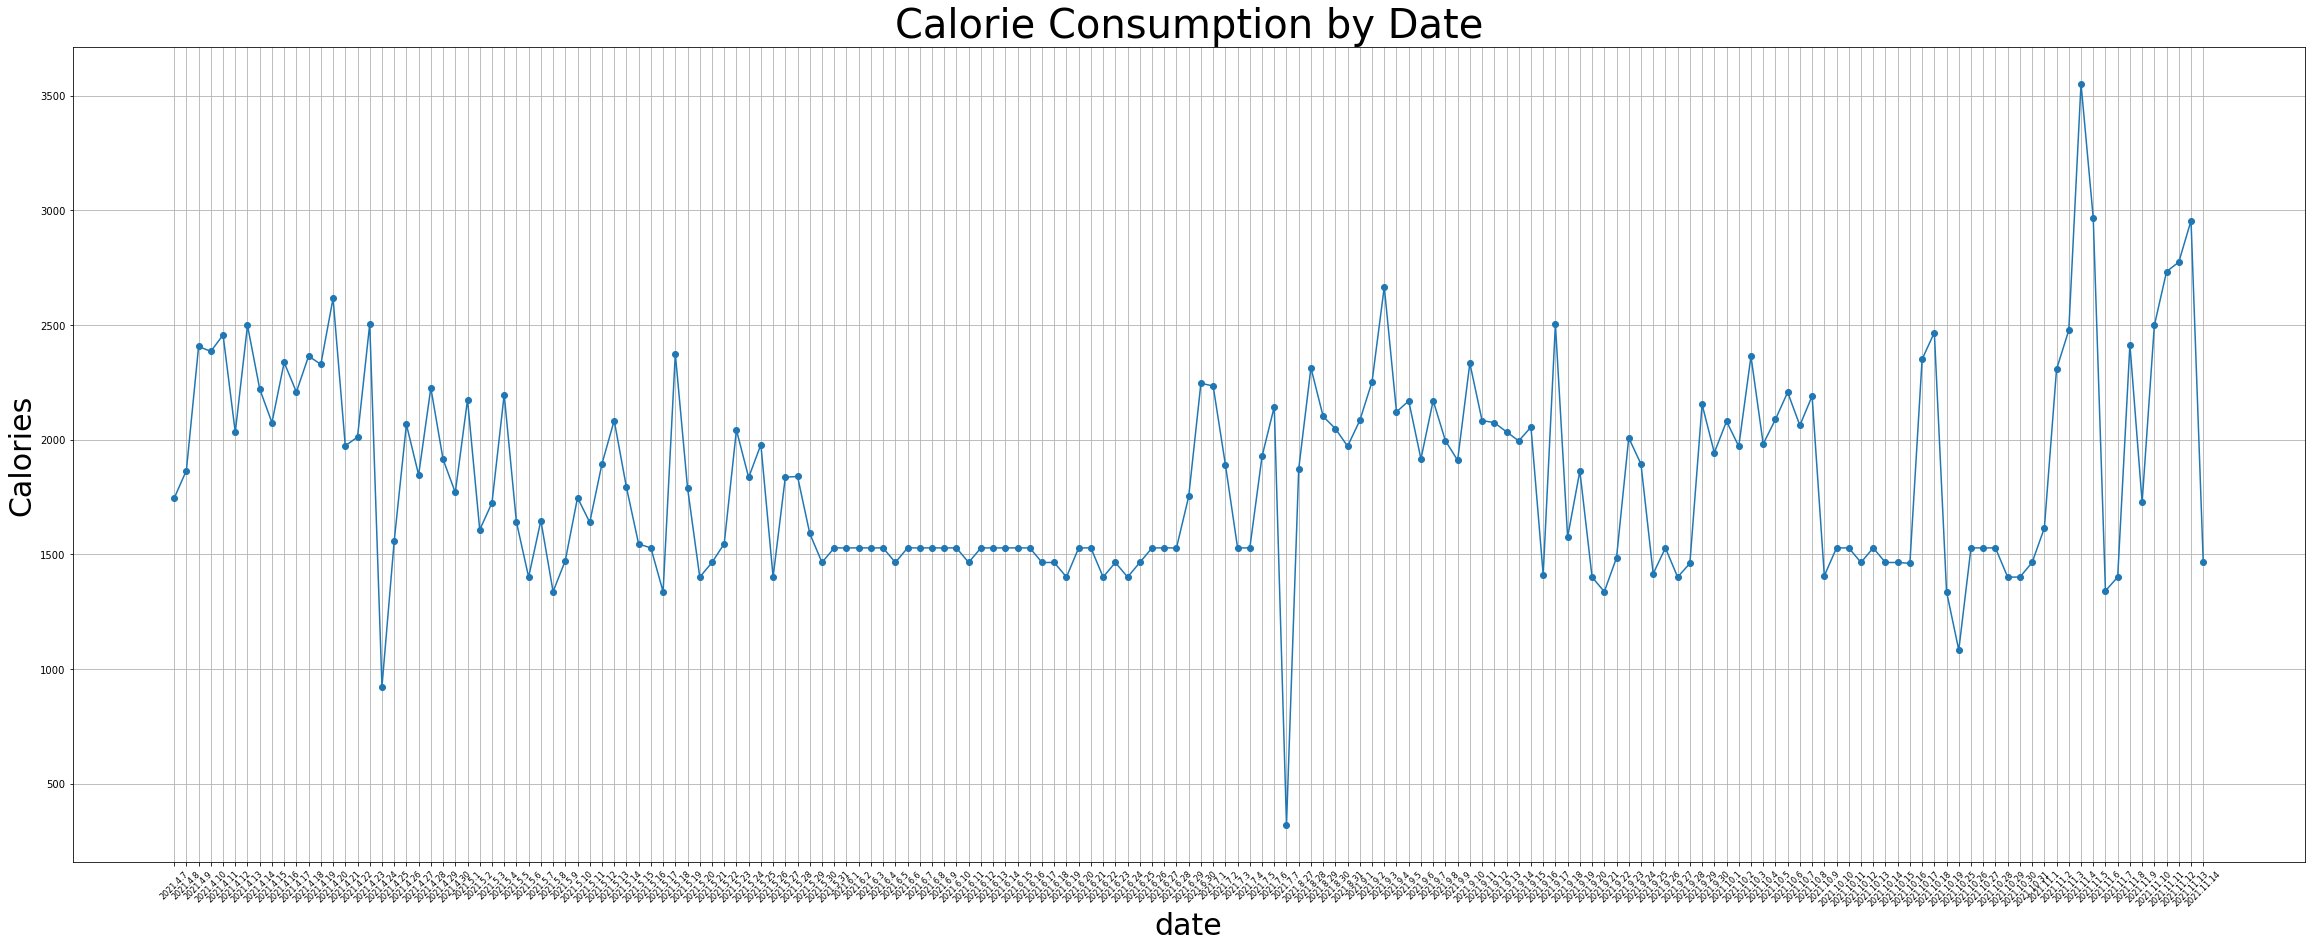

In [9]:
from matplotlib import pyplot as plt 

%matplotlib inline
plt.figure(figsize=(40, 15))
plt.plot(fitbit['date'],fitbit['calories'], marker='o')
plt.xticks(rotation = 45, fontsize= 8)
plt.title('Calorie Consumption by Date', fontsize = 40)
plt.xlabel('date',fontsize = 30) 
plt.ylabel('Calories',fontsize = 30)
plt.savefig('result2.pdf')
plt.grid(True)

## 3. 이동한 거리(distance)와 소모된 칼로리(calories)와의 관계를 알아보고자 합니다. x축은 distance, y축은 calories로 산점도를 그려보세요. (scatter plotting)

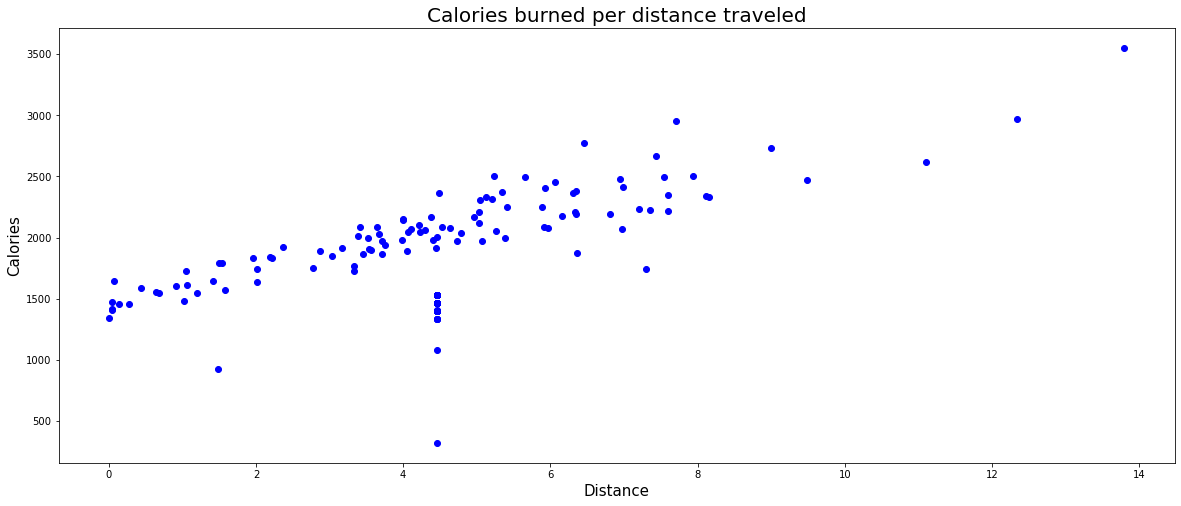

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure(figsize=(20, 8))
plt.scatter(fitbit['distances'],fitbit['calories'], color= 'blue', alpha=1)
plt.title('Calories burned per distance traveled', fontsize = 20)
plt.xlabel('Distance',fontsize = 15) 
plt.ylabel('Calories',fontsize = 15)
plt.savefig('result3.pdf')
plt.show()

+ 추가로 거리에 따른 칼로리와 걸음 수 비교 해보기

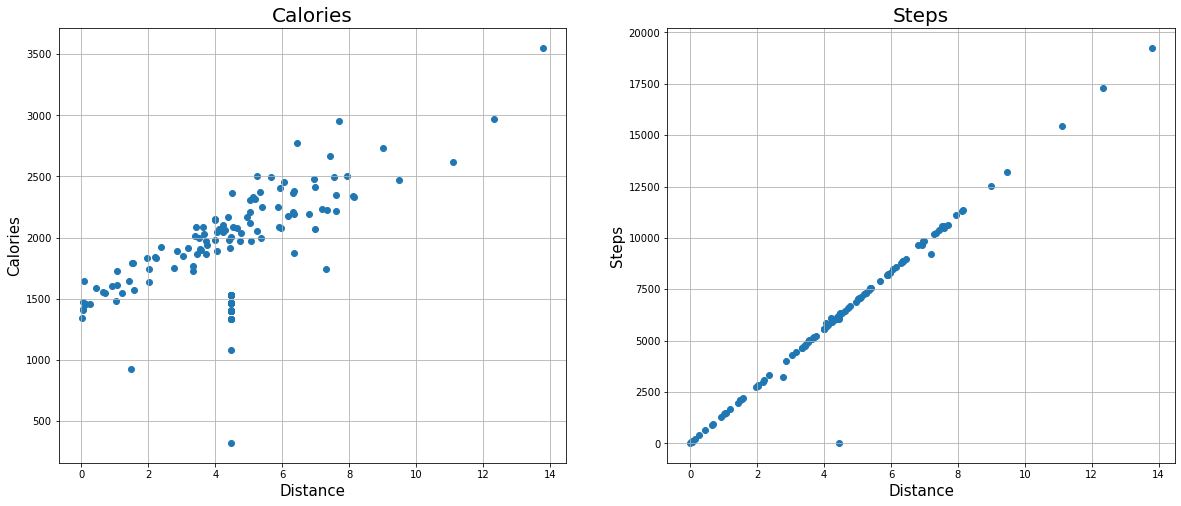

In [11]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.scatter(fitbit['distances'],fitbit['calories'], alpha=1)
plt.title('Calories', fontsize = 20)
plt.xlabel('Distance',fontsize = 15) 
plt.ylabel('Calories',fontsize = 15)
plt.grid(True)


plt.subplot(1,2,2)
plt.scatter(fitbit['distances'],fitbit['steps'], alpha=1)
plt.title('Steps', fontsize = 20)
plt.xlabel('Distance',fontsize = 15) 
plt.ylabel('Steps',fontsize = 15)
plt.savefig('result3-1.pdf')
plt.grid(True)
plt.show()

#### 비교 결과 비례한 결과를 나타냄

## 4. 요일 별로 소모 칼로리. 이동거리, 평균 steps 수를 분석해 보고 나름대로의 결론을 내려보세요.

- 먼저 요일을 구분하기 위해 to_datetime()를 사용하여 형식을 바꿔준다

In [12]:
fitbit

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174.000000
1,2021.4.8,1865.11,3.460000,4829.000000
2,2021.4.9,2406.20,5.920000,8262.000000
3,2021.4.10,2384.56,6.350000,8864.000000
4,2021.4.11,2456.50,6.059999,8467.000000
...,...,...,...,...
162,2021.11.10,2498.06,5.660000,7912.000000
163,2021.11.11,2732.86,9.000000,12536.000000
164,2021.11.12,2774.22,6.450000,8985.000000
165,2021.11.13,2954.84,7.710000,10621.000000


In [13]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       167 non-null    object 
 1   calories   167 non-null    float64
 2   distances  167 non-null    float64
 3   steps      167 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.3+ KB


### date을 datatime으로 바꾸기 && 날짜에 따라 요일 구분하기

In [14]:
fitbit['date'] = pd.to_datetime(fitbit['date'], format='%Y-%m-%d') # 날짜 형식을 datetime으로 포맷 바꿔주기
fitbit['weekday'] = fitbit['date'].dt.weekday # 요일 정보 숫자로 추출(0~6)
fitbit['day_name'] = fitbit['date'].dt.day_name() # 요일 정보 영어 이름으로 추출
fitbit

# 날짜를 이용하여 데이털르 조회하려면 위와 같은 형식을 위와 같이 datatime으로 바꿔줘야 함.

,date,calories,distances,steps,weekday,day_name
0,2021-04-07,1744.27,7.300000,10174.000000,2,Wednesday
1,2021-04-08,1865.11,3.460000,4829.000000,3,Thursday
2,2021-04-09,2406.20,5.920000,8262.000000,4,Friday
3,2021-04-10,2384.56,6.350000,8864.000000,5,Saturday
4,2021-04-11,2456.50,6.059999,8467.000000,6,Sunday
...,...,...,...,...,...,...
162,2021-11-10,2498.06,5.660000,7912.000000,2,Wednesday
163,2021-11-11,2732.86,9.000000,12536.000000,3,Thursday
164,2021-11-12,2774.22,6.450000,8985.000000,4,Friday
165,2021-11-13,2954.84,7.710000,10621.000000,5,Saturday


In [15]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       167 non-null    datetime64[ns]
 1   calories   167 non-null    float64       
 2   distances  167 non-null    float64       
 3   steps      167 non-null    float64       
 4   weekday    167 non-null    int64         
 5   day_name   167 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.0+ KB


In [16]:
# weekday을 기준으로 요일별로 calories, distances, steps 평군 내기
#day average : da
fitbit.groupby('weekday').mean()

,calories,distances,steps
weekday,,,
0,1771.546667,4.411407,6120.788162
1,1850.301250,4.481376,6210.647196
2,1812.871250,4.621376,6419.897196
3,1895.617826,4.739696,6550.066640
4,1988.057917,5.047193,7024.326713
5,1716.314592,3.620959,4769.451713
6,1767.989583,4.312272,5997.179128


 ### 요일에 따른 각각의 컬럼의 평균을 가지고 새로운 데이터 프레임 생성

In [17]:
from pandas import DataFrame

day_avg = DataFrame({ 
    'Day conut' : fitbit.groupby(['weekday'])['weekday'].count(),
    'Day of the week' : ['MON',  'TUE', 'WED', 'THU','FRI','SAT','SUN'],
    'Calories' : fitbit.groupby(['weekday'])['calories'].mean(),
    'Distances' : fitbit.groupby(['weekday'])['distances'].mean(),
    'Steps' : fitbit.groupby(['weekday'])['steps'].mean()
})

day_avg

,Day conut,Day of the week,Calories,Distances,Steps
weekday,,,,,
0,24,MON,1771.546667,4.411407,6120.788162
1,24,TUE,1850.301250,4.481376,6210.647196
2,24,WED,1812.871250,4.621376,6419.897196
3,23,THU,1895.617826,4.739696,6550.066640
4,24,FRI,1988.057917,5.047193,7024.326713
5,24,SAT,1716.314592,3.620959,4769.451713
6,24,SUN,1767.989583,4.312272,5997.179128


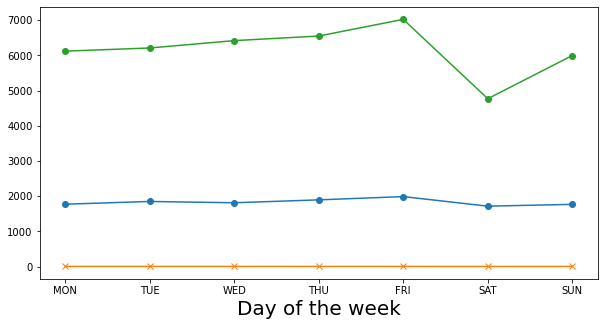

In [18]:
from matplotlib import pyplot as plt 

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(day_avg['Day of the week'],day_avg['Calories'], marker='o')
plt.plot(day_avg['Day of the week'],day_avg['Distances'], marker='x')
plt.plot(day_avg['Day of the week'],day_avg['Steps'], marker='o')

plt.xlabel('Day of the week',fontsize = 20) 
plt.show()

# 이렇게 그리면 y값의 숫자 범위가 달라 경향성을 파악하기 어렵기 때문에 따로 그려보자

In [19]:
# 평균 선 
cal_dayavg= day_avg['Calories'].mean()
dis_dayavg= day_avg['Distances'].mean()
ste_dayavg= day_avg['Steps'].mean()


### 요일에 따른 각 컬럼의 평균값 그래프로 표현

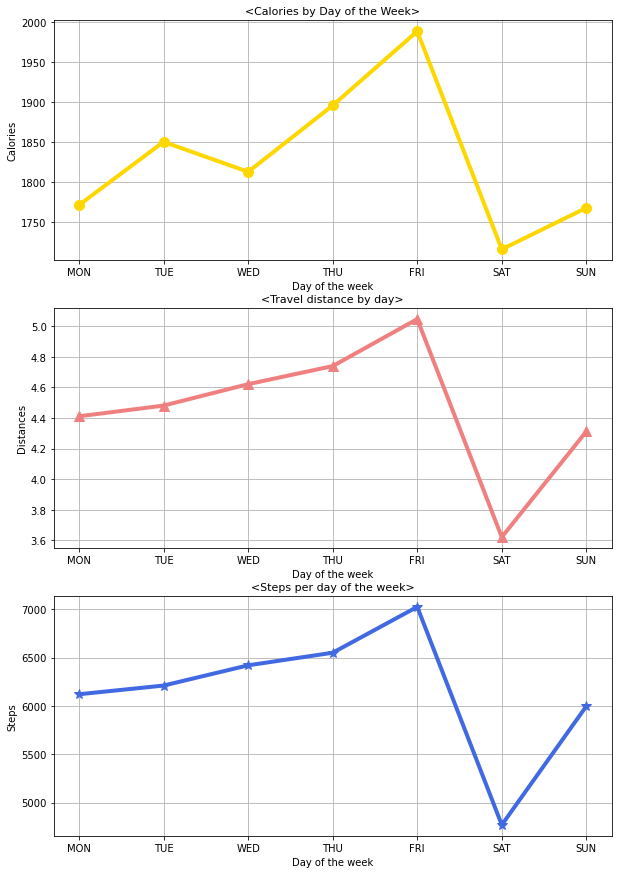

In [20]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
plt.plot(day_avg['Day of the week'],day_avg['Calories'], color='gold', linewidth="4", marker='o', markersize=10)
#plt.axhline(y=cal_dayavg, xmin=0, xmax=1, color='black', linestyle='solid') # 평균 선
plt.title('<Calories by Day of the Week>', fontsize = 11)
plt.xlabel('Day of the week',fontsize = 10) 
plt.ylabel('Calories',fontsize = 10)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(day_avg['Day of the week'],day_avg['Distances'],color='lightcoral', linewidth="4", marker='^', markersize=10)
#plt.axhline(y=dis_dayavg, xmin=0, xmax=1, color='black', linestyle='solid') # 평균 선
plt.title('<Travel distance by day>', fontsize = 11)
plt.xlabel('Day of the week',fontsize = 10) 
plt.ylabel('Distances',fontsize = 10)
plt.grid(True)


plt.subplot(3,1,3)
plt.plot(day_avg['Day of the week'],day_avg['Steps'],color='royalblue', linewidth="4", marker='*', markersize=10)
#plt.axhline(y=ste_dayavg, xmin=0, xmax=1, color='black', linestyle='solid') # 평균 선
plt.title('<Steps per day of the week>', fontsize = 11)
plt.xlabel('Day of the week',fontsize = 10) 
plt.ylabel('Steps',fontsize = 10)
plt.grid(True)

plt.savefig('result4.pdf')
plt.show()